## 1. Getting Started: Airbnb Copenhagen

Kim Tranberg - 172394

Markéta Lapčíková - 304125

Deniss Puzirevs - 304579

In [1]:
import pandas as pd
import sklearn as sk

# 1 Load and select columns

In [2]:
# load the data
data = pd.read_csv('listings.csv')
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]
data_limited.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


In [3]:
data_limited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_cleansed          13815 non-null  object 
 5   latitude                        13815 non-null  float64
 6   longitude                       13815 non-null  float64
 7   room_type                       13815 non-null  object 
 8   price                           13815 non-null  object 
 9   minimum_nights                  13815 non-null  int64  
 10  number_of_reviews               13815 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  review_scores_rating            

# 2 Handle missing values

In [4]:
# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


In [5]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12126 entries, 0 to 13814
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12126 non-null  int64  
 1   name                            12126 non-null  object 
 2   host_id                         12126 non-null  int64  
 3   host_name                       12126 non-null  object 
 4   neighbourhood_cleansed          12126 non-null  object 
 5   latitude                        12126 non-null  float64
 6   longitude                       12126 non-null  float64
 7   room_type                       12126 non-null  object 
 8   price                           12126 non-null  object 
 9   minimum_nights                  12126 non-null  int64  
 10  number_of_reviews               12126 non-null  int64  
 11  last_review                     12126 non-null  object 
 12  review_scores_rating            

# 3 Fix 'neighbourhood_cleansed'

In [6]:
# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

# replace Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

['Nrrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'sterbro' 'Amager Vest'
 'Frederiksberg' 'Amager st' 'Valby' 'Bispebjerg' 'Vanlse' 'Brnshj-Husum']
['Nørrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Østerbro'
 'Amager Vest' 'Frederiksberg' 'Amager st' 'Valby' 'Bispebjerg' 'Vanløse'
 'Brønshøj-Husum']


In [7]:
# change values in price from $650 to 650, then multiply by 6.94 to get DKK

data_filtered["price"] = data_filtered["price"].str.replace('$', '')
data_filtered["price"] = data_filtered["price"].str.replace(',', '')
data_filtered["price"] = data_filtered["price"].astype(float)
#data_filtered["price"] = data_filtered["price"] * 6.94
data_filtered.head()

/tmp/ipykernel_424128/93966028.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_filtered["price"] = data_filtered["price"].str.replace('$', '')


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


# 4 Wordcloud from AirBnB name

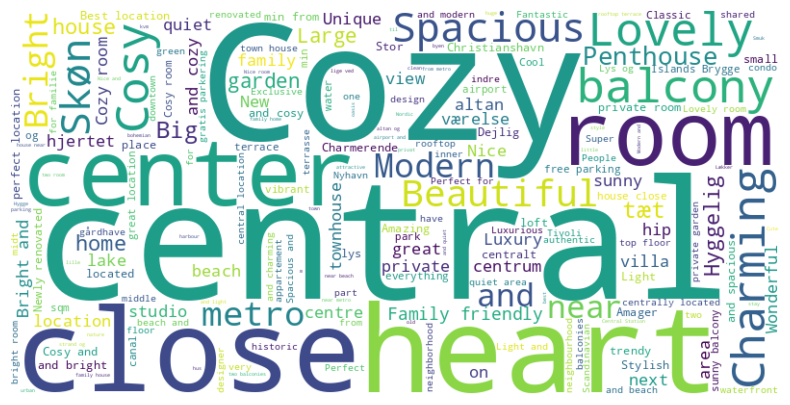

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# display a word cloud from the name column in data_filtered
text = ' '.join(data_filtered.name)

nono_words = ['Østerbro','Copenhagen', 'København','in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh','Ballerup','Hellerup','Valby','Vanløse','Brønhøj','Nørrebro','Vesterbro',]
nd = ["Copenhagen", "CPH", "in", "with", "to", "of", "a", "the", "på", "København", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]
exclude = set(nono_words + nd)

# need to upgrade Pillow to make it work on linux
# pip install --upgrade Pillow
# restart jupyter kernel after installing/upgrading Pillow

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=exclude).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


# 5 Wordcloud from host name

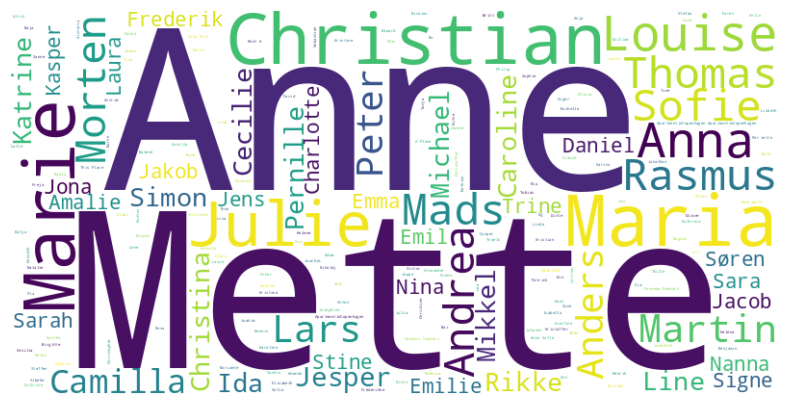

In [9]:
text = ' '.join(data_filtered['host_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nono_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

Female names from dansk statistik
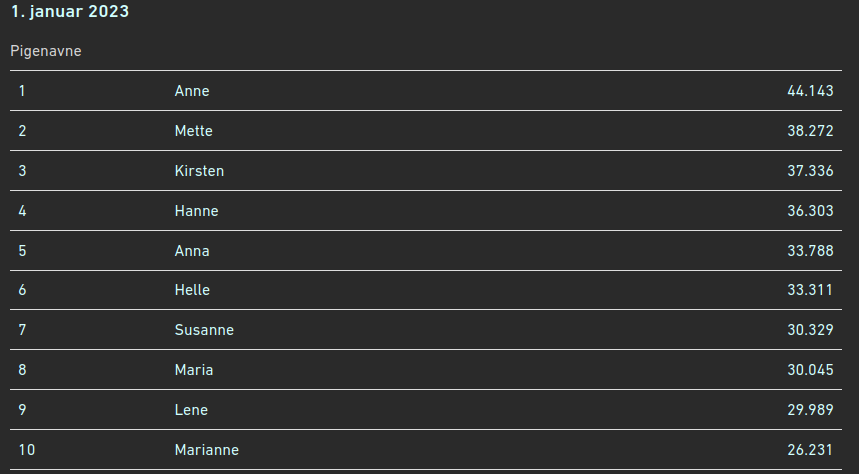

# 6 Bin the price

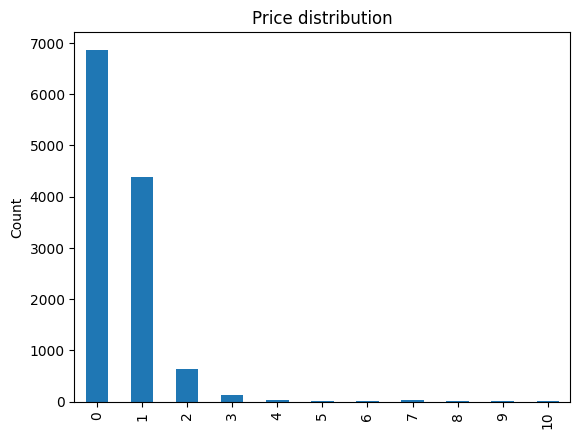

In [10]:
import numpy as np
# create 11 bins for the cost coulumn starting at 0 and having the 11th bin above 10000

# Define the bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]

data_bins = data_filtered
# Create a new column 'bins' with the bin edges
data_bins['price_bins'] = pd.cut(data_filtered['price'], bins=bin_edges, labels=False)

# Create a basic bar plot
# plot the price bins in numbered order
data_bins['price_bins'].value_counts().sort_index().plot(kind='bar')

# Add lables and title
plt.ylabel('Count')
plt.title('Price distribution')

# Display the plot
plt.show()

Vissualize the distribution of selected columns

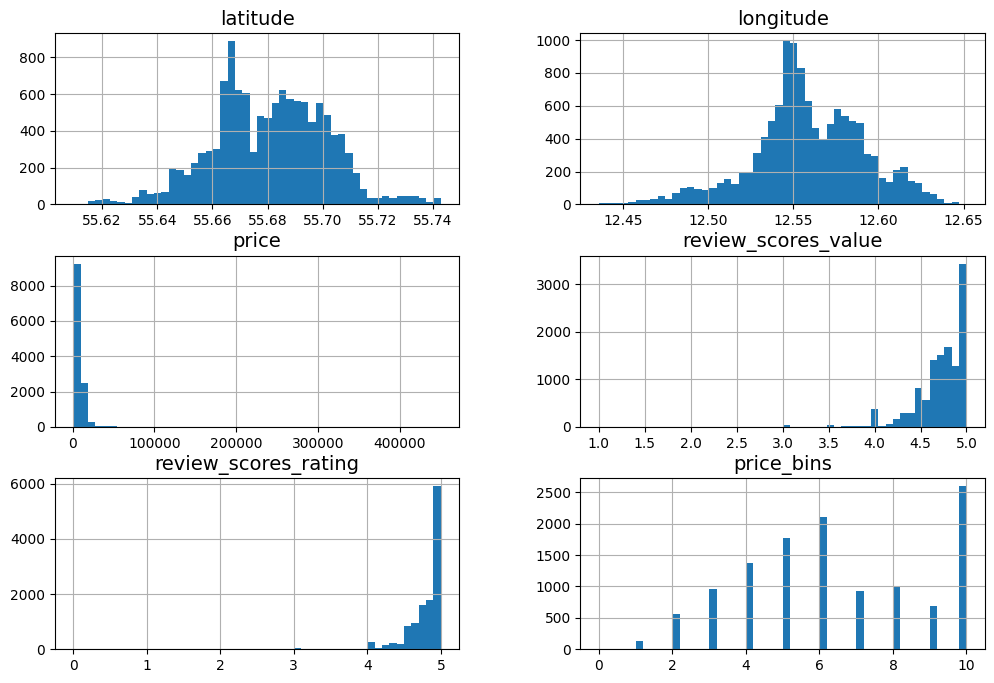

In [53]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# show these columnds
columns = ['latitude', 'longitude', 'price','review_scores_value','review_scores_rating','price_bins']

data_bins[columns].hist(bins=50, figsize=(12, 8))
plt.show()

# 7 Map plots

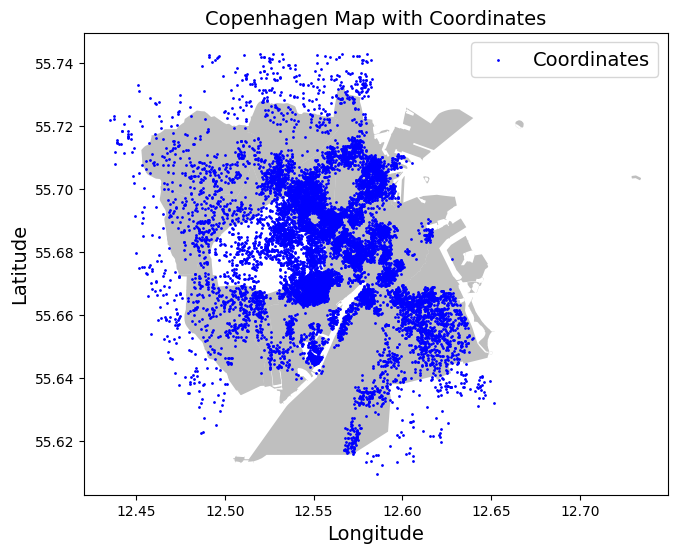

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
copenhagen.plot(ax=plt.gca(), alpha=0.5, color='gray')
plt.scatter(data_bins['longitude'], data_bins['latitude'], c='blue', marker='o', label='Coordinates', s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Copenhagen Map with Coordinates')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


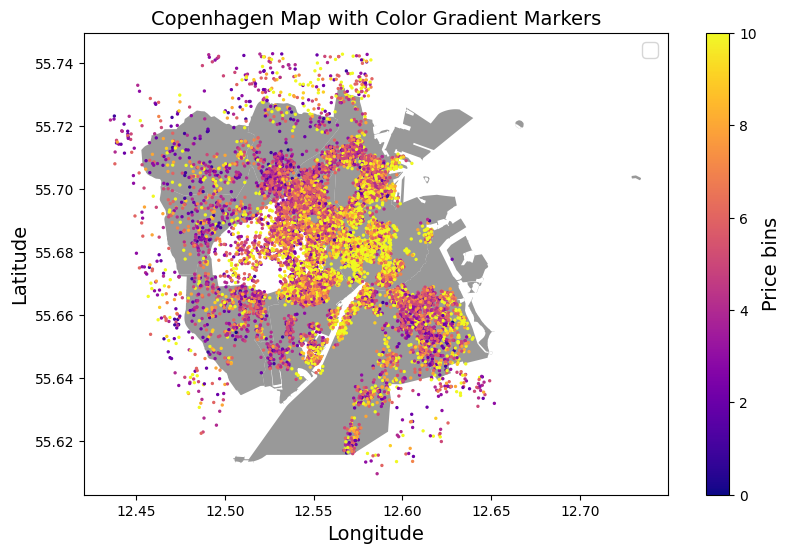

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.8, color='gray')

# Create a scatter plot with a color gradient
scatter = ax.scatter(
    data_bins['longitude'],
    data_bins['latitude'],
    c=data_bins['price_bins'],
    cmap='plasma',
    marker='o',
    s=2,  # Adjust marker size as needed
)

# Add colorbar
plt.colorbar(scatter, label='Price bins')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Color Gradient Markers')
plt.legend()
plt.show()

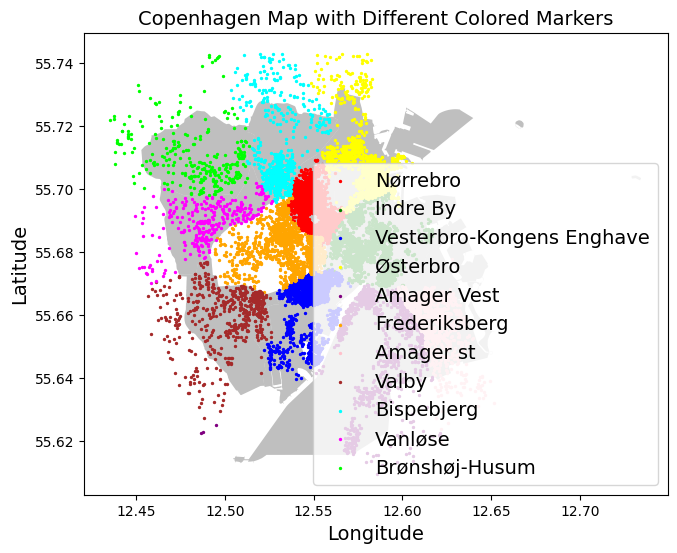

In [56]:
# Neigbourhood grouping
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# distinct neighbourhoods
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
neighbourhood_colors = dict()
colors = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "brown", "cyan", "magenta", "lime"]

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# connect the colors to categories
for i, n in enumerate(neighbourhoods):
    neighbourhood_colors[n] = colors[i]

# Create subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.5, color='gray')

# Create a scatter plot with different colors for each category
for neighbourhood, color in neighbourhood_colors.items():
    subset = data_bins[data_bins['neighbourhood_cleansed'] == neighbourhood]
    ax.scatter(
        subset['longitude'],
        subset['latitude'],
        color=color,
        label=neighbourhood,
        marker='o',
        s=2,  # marker size
    )

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Different Colored Markers')
plt.legend()
plt.show()

# 8 Boxplots

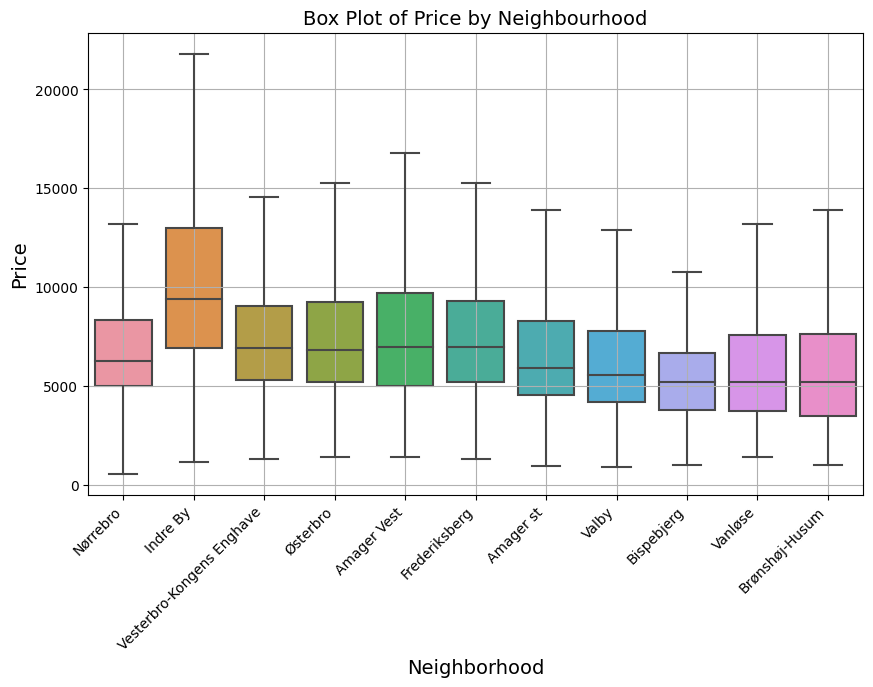

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
# showfliers=False will hide the outliers
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Box Plot of Price by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

This boxplot shows us that rentals located in the centre has the most expensive flats, both mode and highest non-outlier value.

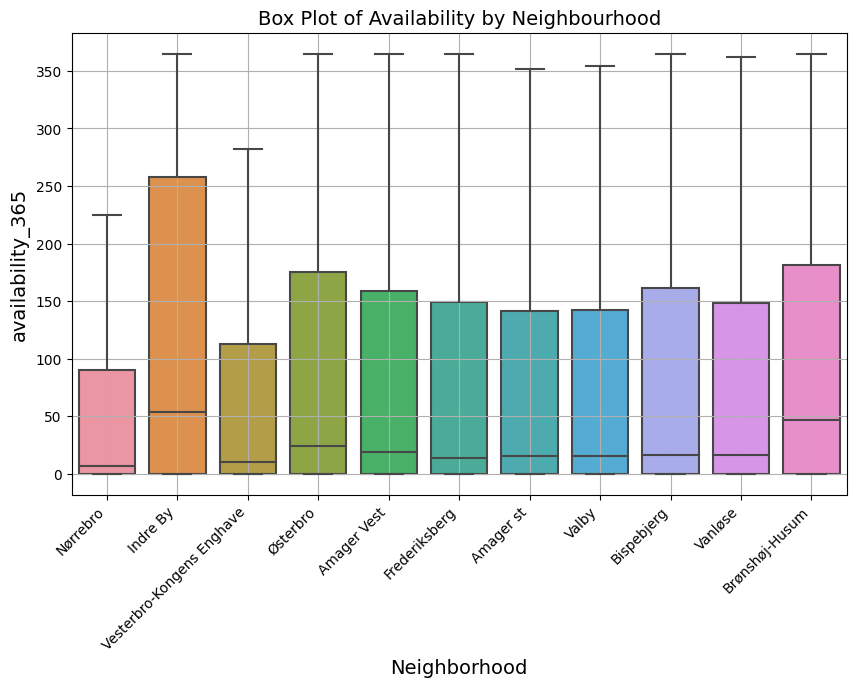

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('availability_365')
plt.title('Box Plot of Availability by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

Mode of central rentals is much higher than the mode of the other neighbourhoods.

# 9 Bar chart

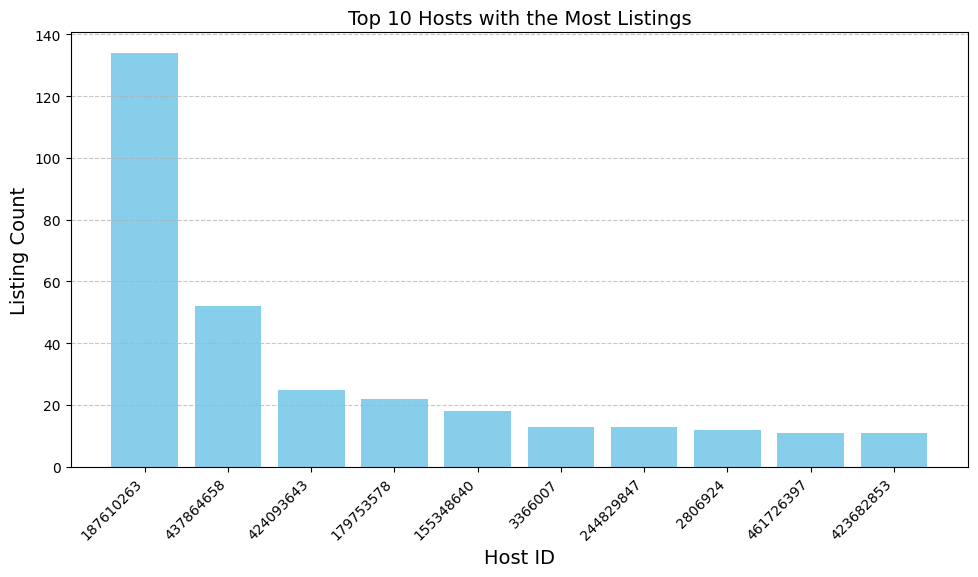

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of listings for each host
host_listing_counts = data_bins['host_id'].value_counts().reset_index()
host_listing_counts.columns = ['host_id', 'listing_count']

# Sort the hosts by listing count and select the top 10
top_hosts = host_listing_counts.nlargest(10, 'listing_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_hosts['host_id'].astype(str), top_hosts['listing_count'], color='skyblue')

# Add labels and title
plt.xlabel('Host ID')
plt.ylabel('Listing Count')
plt.title('Top 10 Hosts with the Most Listings')

# Customize the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10 Descriptive analysis

In [60]:
# group each roomtype by neighbourhood
roomtype = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe()

# calculate mode for each neighbourhood
mode = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].apply(lambda x: x.mode()[0])

# calculate median for each neighbourhood
median = data_bins.groupby(['neighbourhood_cleansed', 'room_type'])['price'].median()

# group description, mode and median into one dataframe
roomtype = pd.concat([roomtype, mode, median], axis=1)

# rename columns
roomtype.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'median']

roomtype # Descriptive statistics for each neighbourhood and room type on price

count          mean           std  \
neighbourhood_cleansed    room_type                                             
Amager Vest               Entire home/apt   909.0   8565.532761   5778.916421   
                          Private room      148.0   7168.785541  36775.185577   
                          Shared room         2.0   7297.410000    780.264049   
Amager st                 Entire home/apt   791.0   7589.473451   5010.557049   
                          Hotel room          3.0   8994.240000   1465.622187   
                          Private room      129.0   3812.319535   2040.332183   
                          Shared room         1.0  17870.500000           NaN   
Bispebjerg                Entire home/apt   508.0   6888.592087  13752.168983   
                          Private room       95.0   3393.513895   2454.498178   
                          Shared room         1.0   1374.120000           NaN   
Brønshøj-Husum            Entire home/apt   216.0   7044.067870   3856.346663   
                          Private room       67.0   3092.132537   1399.323468   
                          Shared room         2.0   1467.810000    112.868384   
Frederiksberg             Entire home/apt  1044.0   8969.757222  13594.091241   
                          Private room      133.0   4314.644962   3939.221865   
Indre By                  Entire home/apt  1702.0  11398.167109   7443.956647   
                          Hotel room         10.0   7475.768000   4540.530381   
                          Private room      128.0   4850.951563   2637.689031   
                          Shared room         4.0   2026.480000    468.985188   
Nørrebro                  Entire home/apt  1889.0   7271.330810   4050.900333   
                          Private room      165.0   4511.841212   5276.274079   
                          Shared room         3.0   2253.186667    905.539256   
Valby                     Entire home/apt   450.0   7064.704089   4409.916754   
                          Private room       89.0   3457.211685   2002.997581   
Vanløse                   Entire home/apt   254.0   6623.710866   3446.808738   
                          Private room       44.0   2869.059091   1350.375848   
Vesterbro-Kongens Enghave Entire home/apt  1811.0   8199.159724   4844.970018   
                          Private room      221.0   3986.103620   2052.344657   
                          Shared room         2.0   2293.670000    790.078691   
Østerbro                  Entire home/apt  1174.0   8664.944685   9986.023020   
                          Private room      130.0   4201.903077   3034.577672   
                          Shared room         1.0   3254.860000           NaN   

                                                min        25%       50%  \
neighbourhood_cleansed    room_type                                        
Amager Vest               Entire home/apt   1735.00   5649.160   7287.00   
                          Private room      1388.00   2776.000   3470.00   
                          Shared room       6745.68   7021.545   7297.41   
Amager st                 Entire home/apt   1665.60   4858.000   6246.00   
                          Hotel room        7974.06   8154.500   8334.94   
                          Private room       936.90   2776.000   3268.74   
                          Shared room      17870.50  17870.500  17870.50   
Bispebjerg                Entire home/apt   1630.90   4164.000   5552.00   
                          Private room       992.42   2082.000   2776.00   
                          Shared room       1374.12   1374.120   1374.12   
Brønshøj-Husum            Entire home/apt   1735.00   4550.905   6246.00   
                          Private room      1006.30   2220.800   2776.00   
                          Shared room       1388.00   1427.905   1467.81   
Frederiksberg             Entire home/apt   2082.00   5708.150   7196.78   
                          Private room      1283.90   2776.000   3470.00 

# 11 Top 10 rating

In [61]:
import folium

# Sort the DataFrame by 'review_scores_rating' in descending order and select the top 10
top_10_ratings = data_bins.nlargest(10, 'review_scores_rating')

# Create a Folium map centered around the first entry in the top 10
map_center = [top_10_ratings.iloc[0]['latitude'], top_10_ratings.iloc[0]['longitude']]
m = folium.Map(location=map_center, zoom_start=13)

# Add markers for the top 10 highest-rated entries
for index, row in top_10_ratings.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Rating: {row['review_scores_rating']}",
                  icon=folium.Icon(icon='star')).add_to(m)

# Save the map as an HTML file (optional)
m.save('top_10_ratings_map.html')

top_10_ratings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bins
8,37159,Unique space on greatest location,160390,Jeanette,Indre By,55.685470,12.565430,Entire home/apt,20237.04,5,...,4.78,5.00,5.00,5.00,4.89,4.78,0.07,1,0,10
9,38499,0 min. from everything in Cph.,122489,Christina,Indre By,55.684288,12.573019,Entire home/apt,13186.00,14,...,4.56,4.89,5.00,5.00,5.00,4.89,0.10,1,87,10
13,71168,beautiful penthouse with rooftop,141625,Pernille & Frederik,Frederiksberg,55.678060,12.550440,Entire home/apt,15975.88,2,...,5.00,4.90,4.90,5.00,5.00,5.00,0.09,1,9,10
21,135777,Boheme,665428,Sofie,Nørrebro,55.692230,12.542120,Entire home/apt,5163.36,5,...,5.00,5.00,5.00,5.00,5.00,5.00,0.05,1,0,5
24,154529,Beautiful Frederiksberg,743327,Cecilie,Frederiksberg,55.687010,12.533480,Entire home/apt,4858.00,6,...,5.00,4.63,5.00,5.00,5.00,4.88,0.19,1,301,4
37,240802,Copenhagen big top floor apartment,1263184,Mette,Nørrebro,55.688680,12.560860,Entire home/apt,14449.08,2,...,5.00,5.00,4.89,5.00,5.00,4.89,0.07,1,51,10
48,300482,Cozy apartment near the center,1517376,Lene,Amager Vest,55.666240,12.596360,Entire home/apt,8328.00,3,...,5.00,4.83,5.00,5.00,4.83,4.83,0.10,2,0,8
63,339321,Bright & airy - central Copenhagen♥,1720468,Hodan,Nørrebro,55.690910,12.554900,Private room,4989.86,3,...,4.81,5.00,4.93,4.96,4.81,4.67,0.23,1,0,4
65,343137,Childfriendly penthouse with private terrace,1741097,Josephine,Frederiksberg,55.677610,12.546730,Entire home/apt,13845.30,3,...,4.85,4.81,5.00,4.89,4.96,4.70,0.22,1,276,10
76,406081,197m2! Beautiful apartment (family cargobike i...,2023659,Mikael,Østerbro,55.708575,12.576109,Entire home/apt,12145.00,5,...,5.00,5.00,5.00,5.00,5.00,5.00,0.48,1,85,10


In [62]:
# Display the map
m

# 12 Preprocessing and feature engineering

In [63]:
# remove shared rooms and hotel rooms
data_bins = data_bins[data_bins.room_type != 'Shared room']
data_bins = data_bins[data_bins.room_type != 'Hotel room']

# do one hot encoding on selected columns

# one hot encoding on neighbourhoods
df_encoded = pd.get_dummies(data_bins, columns=['neighbourhood_cleansed'], prefix='Neighbourhood')

# should i be done on room type?
df_encoded = pd.get_dummies(df_encoded, columns=['room_type'], prefix='room_type')

print(df_encoded.columns)

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_bins',
       'Neighbourhood_Amager Vest', 'Neighbourhood_Amager st',
       'Neighbourhood_Bispebjerg', 'Neighbourhood_Brønshøj-Husum',
       'Neighbourhood_Frederiksberg', 'Neighbourhood_Indre By',
       'Neighbourhood_Nørrebro', 'Neighbourhood_Valby',
       'Neighbourhood_Vanløse', 'Neighbourhood_Vesterbro-Kongens Enghave',
       'Neighbourhood_Østerbro', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')


In [64]:
data_bins['room_type'].value_counts()

Entire home/apt    10748
Private room        1349
Name: room_type, dtype: int64

# 13 Affordability

In [65]:
# Calculate the median price
median_price = df_encoded['price'].median()

data_affordability = df_encoded
# Create the 'price_group' column where 1 indicates above median, and 0 indicates below median
data_affordability['expensiveness'] = np.where(data_affordability['price'] > median_price, 1, 0)

print(median_price)

# Display the DataFrame
data_affordability.head()

6794.26


,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,Neighbourhood_Frederiksberg,Neighbourhood_Indre By,Neighbourhood_Nørrebro,Neighbourhood_Valby,Neighbourhood_Vanløse,Neighbourhood_Vesterbro-Kongens Enghave,Neighbourhood_Østerbro,room_type_Entire home/apt,room_type_Private room,expensiveness
0,6983,Copenhagen 'N Livin',16774,Simon,55.686410,12.547410,6232.12,3,172,2022-06-21,...,0,0,1,0,0,0,0,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,55.693070,12.576490,18044.00,4,59,2022-08-09,...,0,1,0,0,0,0,0,1,0,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,55.676020,12.575400,22555.00,3,300,2022-09-10,...,0,1,0,0,0,0,0,1,0,1
3,29118,Best Location in Cool Istedgade,125230,Nana,55.670230,12.555040,5031.50,7,24,2022-08-04,...,0,0,0,0,0,1,0,1,0,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,55.666602,12.555283,13560.76,3,19,2022-08-22,...,0,0,0,0,0,1,0,1,0,1


In [66]:
data_affordability['expensiveness'].value_counts()

0    6050
1    6047
Name: expensiveness, dtype: int64

In [67]:
corr_matrix = data_affordability.corr(numeric_only=True)
corr_matrix["expensiveness"].sort_values(ascending=False)

expensiveness                              1.000000
price_bins                                 0.832041
price                                      0.374416
room_type_Entire home/apt                  0.299563
Neighbourhood_Indre By                     0.221118
availability_365                           0.167687
review_scores_location                     0.165399
longitude                                  0.126093
calculated_host_listings_count             0.077439
review_scores_rating                       0.064478
id                                         0.057305
review_scores_cleanliness                  0.045265
review_scores_accuracy                     0.035227
review_scores_checkin                      0.033605
review_scores_communication                0.029684
Neighbourhood_Frederiksberg                0.019886
Neighbourhood_Vesterbro-Kongens Enghave    0.017801
Neighbourhood_Amager Vest                  0.016177
review_scores_value                        0.010092
Neighbourhoo

# 14 Models

In [68]:
# select what features to keep

keep = ['expensiveness','latitude', 'longitude', 'room_type_Entire home/apt','room_type_Private room']

final_df = data_affordability[keep]
final_df.columns

Index(['expensiveness', 'latitude', 'longitude', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Naïve Bayes

# Split data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Perform 5-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy: 0.5942148760330579
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.22      0.35      1226
           1       0.55      0.98      0.70      1194

    accuracy                           0.59      2420
   macro avg       0.74      0.60      0.53      2420
weighted avg       0.74      0.59      0.53      2420

Cross-validation Scores: [0.60289256 0.58801653 0.59115337 0.58536585 0.61182307]
Mean Accuracy: 0.5958502762223308


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# k-Nearest Neighbor (k-NN)

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test.values) 
# Got an error here. had to follow this instruction to make it work:
# https://github.com/scikit-learn/scikit-learn/issues/26768#issuecomment-1676406055

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6628099173553719
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1226
           1       0.66      0.67      0.66      1194

    accuracy                           0.66      2420
   macro avg       0.66      0.66      0.66      2420
weighted avg       0.66      0.66      0.66      2420



/home/gimpe/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['expensiveness'])
y = final_df['expensiveness']

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(knn_classifier, X.values, y.values, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.65082645 0.66528926 0.66928483 0.65398925 0.62422489]
Mean Accuracy: 0.6527229337988855


# 15 Conclusion

We think that using price_bins as a feature for our models would make them too reliant on that one information, since it correlates with almost 0.9 to the expensiveness. 

We chose to use longitude and latitude instead of neighbourhood, as latitude and longitude inclues information about neighbourhood and more.
Neighbourhood is a bit ristrictive

So in the end we ended up with these features:
- latitude
- longitude
- room_type

Trying to predict expensiveness.

Since we removed price we do not have any outlires to remove. (maybe it should be done before calculating the mean and deciding what is affordable)

We removed rows with room type 'Shared room' and 'Hotel room' since there were so few of those compared to the rest.

Our Naïve bayes model is very good at predicting affordable rentals, while being very bad at predicting expensive rentals.

Our k-NN model is equally dissapointing at predicting both. Even changing the hyperparameter to values between 1 and 35 did not help.

If we look at the heat map from 7 we can see that the prices fluctuate a lot in the outer neighbourhoods of Copenhagen, while beign very high in the center.  